# CS 4464/7643 Deep Learning HW 1

### Setup - Google Colab

Edit and run the cell below to setup the environment for Google Colab (and only for Google Colab).

In [1]:
#Cell 1
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Cell 2
%cd /content/drive/MyDrive/student_version/data
!sh get_data.sh
%cd ..

### Setup - Local Environment (Mac)

Run the cell below **once** if using the suggested local environment (and only the local environment - Mac).

Then, change the ipykernel in the top right of this VS Code window to `dl_hw1`.

In [ ]:
#Cell 1
%conda env create -f ./local_environment/environment.yaml

In [ ]:
#Cell 2
%cd 'PATH TO HW1 UNZIPPED FILES'/hw1/student_version/data
!sh get_data.sh
%cd ..

### Setup - Local Environment (Windows)

Run the cell below **once** if using the suggested local environment (and only the local environment - Windows).

Then, change the ipykernel in the top right of this VS Code window to `dl_hw1`.

In [ ]:
#Cell 1
%conda env create -f ./local_environment/environment.yaml

In [ ]:
#Cell 2
%cd User\'PATH TO HW1 UNZIPPED FILES'\hw1\student_version\data
! get_data.bat
%cd ..

### All the following are for both Google Colab and the suggested local environment. 

In [5]:
# Cell 3
# Run all local tests in this block
# If you get an error saying test not found, add an __init__.py file in the
# tests directory
!python -m unittest tests.test_training

Loading training data...
Training data loaded with 60000 images
Loading testing data...
Testing data loaded with 10000 images
...Loading training data...
Training data loaded with 60000 images
Loading testing data...
Testing data loaded with 10000 images
.
----------------------------------------------------------------------
Ran 4 tests in 36.998s

OK


In [6]:
!python -m unittest tests.test_loading

Loading training data...
Training data loaded with 60000 images
.Loading training data...
Training data loaded with 60000 images
.
----------------------------------------------------------------------
Ran 2 tests in 24.964s

OK


In [7]:
!python -m unittest tests.test_activation

.....
----------------------------------------------------------------------
Ran 5 tests in 0.002s

OK


In [8]:
!python -m unittest tests.test_loss

..
----------------------------------------------------------------------
Ran 2 tests in 0.001s

OK


In [9]:
!python -m unittest tests.test_network

..
----------------------------------------------------------------------
Ran 2 tests in 0.042s

OK


In [3]:
#Cell 4
import yaml
import copy

from models import TwoLayerNet, SoftmaxRegression
from optimizer import SGD
from utils import load_mnist_trainval, load_mnist_test, generate_batched_data, train, evaluate, plot_curves

In [4]:
# Cell 5
%matplotlib inline
def train_model(yaml_config_file):
  args = {}
  with open(yaml_config_file) as f:
      config = yaml.full_load(f)

  for key in config:
      for k, v in config[key].items():
          args[k] = v
  
  # Prepare MNIST data
  train_data, train_label, val_data, val_label = load_mnist_trainval()
  test_data, test_label = load_mnist_test()

  # Prepare model and optimizer
  if args["type"] == 'SoftmaxRegression':
      model = SoftmaxRegression()
  elif args["type"] == 'TwoLayerNet':
      model = TwoLayerNet(hidden_size=args["hidden_size"])
  optimizer = SGD(learning_rate=args["learning_rate"], reg=args["reg"])
  
  # Training Code
  train_loss_history = []
  train_acc_history = []
  valid_loss_history = []
  valid_acc_history = []
  best_acc = 0.0
  best_model = None
  for epoch in range(args["epochs"]):
      batched_train_data, batched_train_label = generate_batched_data(train_data, train_label, batch_size=args["batch_size"], shuffle=True)
      epoch_loss, epoch_acc = train(epoch, batched_train_data, batched_train_label, model, optimizer, args["debug"])

      train_loss_history.append(epoch_loss)
      train_acc_history.append(epoch_acc)
      # evaluate on test data
      batched_test_data, batched_test_label = generate_batched_data(val_data, val_label, batch_size=args["batch_size"])
      valid_loss, valid_acc = evaluate(batched_test_data, batched_test_label, model, args["debug"])
      if args["debug"]:
          print("* Validation Accuracy: {accuracy:.4f}".format(accuracy=valid_acc))

      valid_loss_history.append(valid_loss)
      valid_acc_history.append(valid_acc)

      if valid_acc > best_acc:
          best_acc = valid_acc
          best_model = copy.deepcopy(model)
  
  #Testing Code
  batched_test_data, batched_test_label = generate_batched_data(test_data, test_label, batch_size=args["batch_size"])
  _, test_acc = evaluate(batched_test_data, batched_test_label, best_model) # test the best model
  if args["debug"]:
      print("Final Accuracy on Test Data: {accuracy:.4f}".format(accuracy=test_acc))
  
  return train_loss_history, train_acc_history, valid_loss_history, valid_acc_history

In [ ]:
# Cell 6
# train softmax model
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_softmax.yaml")

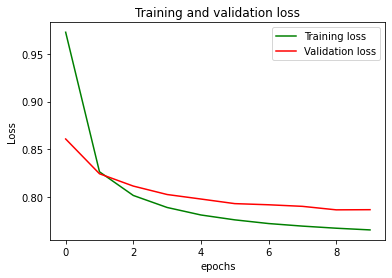

<Figure size 432x288 with 0 Axes>

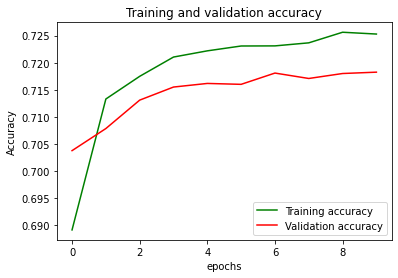

<Figure size 432x288 with 0 Axes>

In [6]:
# Cell 7
# plot results for softmax model
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [ ]:
# Cell 8
# train two layer neural network
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_twolayer.yaml")

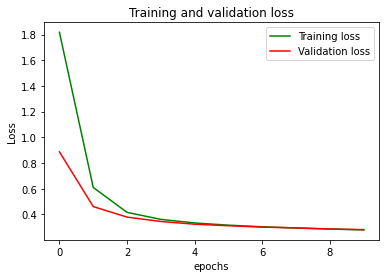

<Figure size 432x288 with 0 Axes>

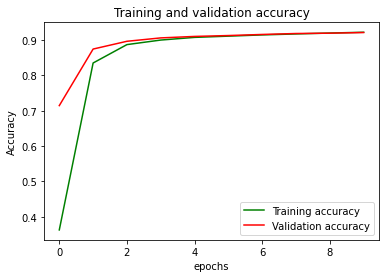

<Figure size 432x288 with 0 Axes>

In [8]:
# Cell 9
# plot two layer neural network
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

# **Assignment 1 Writeup**

- Name: Vera Katasonova
- GT Email: vkatasonova3@gatech.edu
- GT ID: 903763854



## Two Layer Neural Network

# Learning Rates

- Tune the Two Layer Neural Network with various learning rates (while keeping all other hyperparameters constant) by changing the config file.
  - lr = 1
  - lr = 1e-1
  - lr = 1e-2
  - lr = 5e-2


In [ ]:
# Cell 10
# Change lr to 1 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

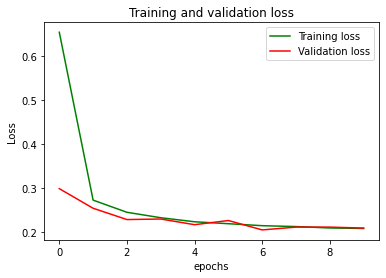

<Figure size 432x288 with 0 Axes>

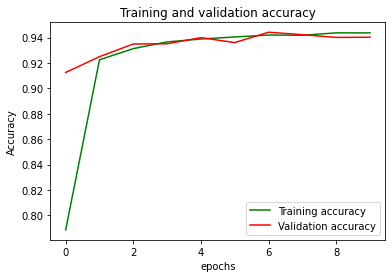

<Figure size 432x288 with 0 Axes>

In [14]:
# Cell 11
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [ ]:
# Cell 12
# Change lr to 1e-1 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

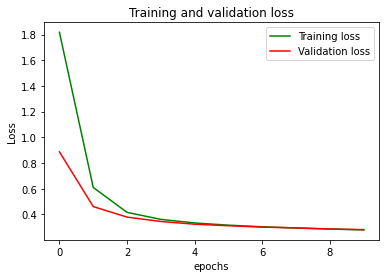

<Figure size 432x288 with 0 Axes>

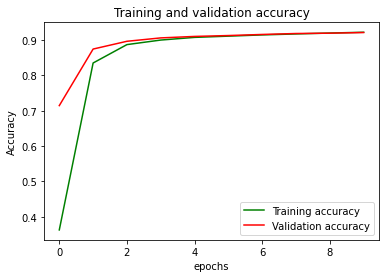

<Figure size 432x288 with 0 Axes>

In [12]:
# Cell 13
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [ ]:
# Cell 14
# Change lr to 1e-2 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

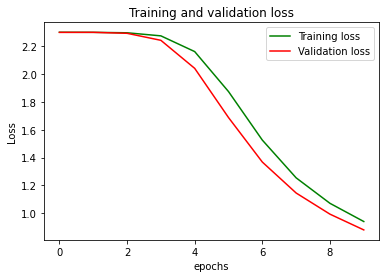

<Figure size 432x288 with 0 Axes>

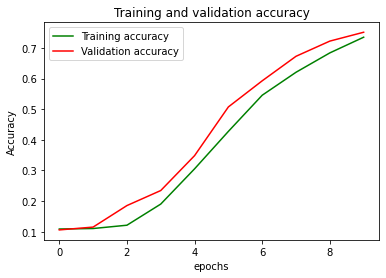

<Figure size 432x288 with 0 Axes>

In [17]:
# Cell 15
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [ ]:
# Cell 16
# Change lr to 5e-2 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

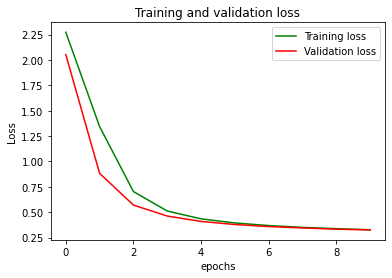

<Figure size 432x288 with 0 Axes>

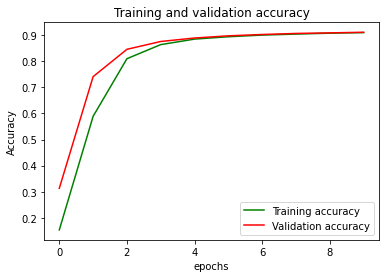

<Figure size 432x288 with 0 Axes>

In [19]:
# Cell 17
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

Describe and explain your findings here:

The learning rate is the parameter by which we multiply a gradient when updating weights. Thus it controls how much to change the model (weights of the model) in responce to the estimated error each time we update the weights. 

Too small learning rate may result in slow convergence and a long traning proccess (many epoches). This case is illustrated on the plot above, when the learning rate is 0.01: 10 epoches weren't enough in this case and the highest accuracy we achieved is only around 0.7 (when with a bigger learning rate accuracy of 0.9 was achieved in 10 epoches).

When the learning rate is too large we may not find the most optimal set of weights or have an unstable training proccess. On the plot above we can see that when the learning rate is 1 the training proccess is unstable eventhough we achived an accuracy of 0.94.

In my opinion, the optimal choice for the hyperparameter learning rate is **0.1** because eventhough when the value 1 we achieved a good accuracy quickly the training proccess isn't stable.

# Regularization

- Tune the Two Layer Neural Network with various regularization coefficients (while keeping all other hyperparameters constant) by changing the config file.
  
  - reg = 1e-1
  - reg = 1e-2
  - reg = 1e-3
  - reg = 1e-4
  - reg = 1


In [ ]:
# Cell 18
# Change reg to 1e-1 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

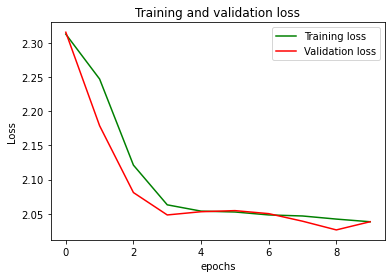

<Figure size 432x288 with 0 Axes>

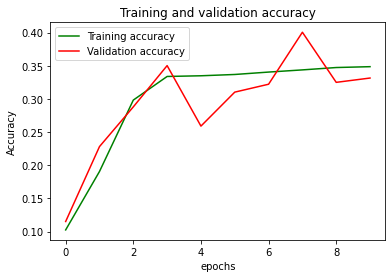

<Figure size 432x288 with 0 Axes>

In [21]:
# Cell 19
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [ ]:
# Cell 20
# Change reg to 1e-2 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

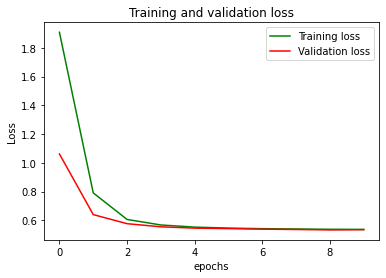

<Figure size 432x288 with 0 Axes>

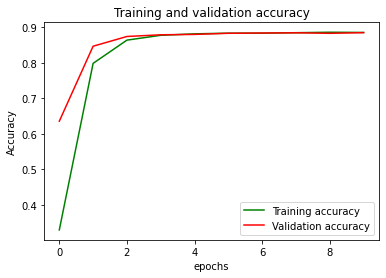

<Figure size 432x288 with 0 Axes>

In [25]:
# Cell 21
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [26]:
# Cell 22
# Change reg to 1e-3 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

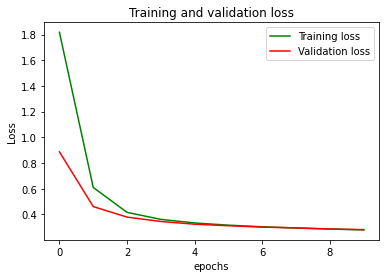

<Figure size 432x288 with 0 Axes>

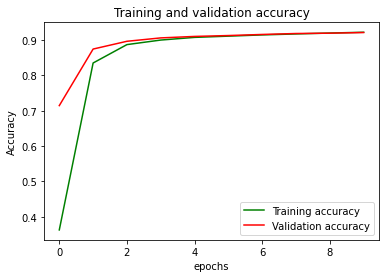

<Figure size 432x288 with 0 Axes>

In [27]:
# Cell 23
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [ ]:
# Cell 24
# Change reg to 1e-4 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

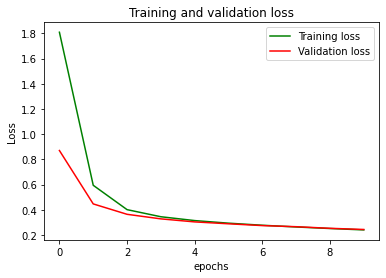

<Figure size 432x288 with 0 Axes>

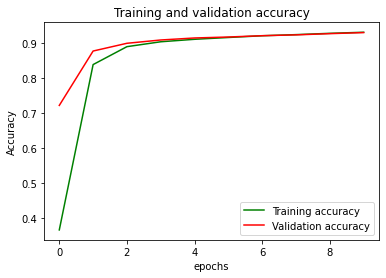

<Figure size 432x288 with 0 Axes>

In [29]:
# Cell 25
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [ ]:
# Cell 26
# Change reg to 1 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

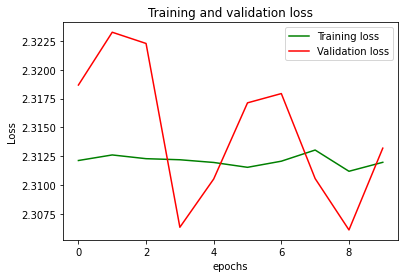

<Figure size 432x288 with 0 Axes>

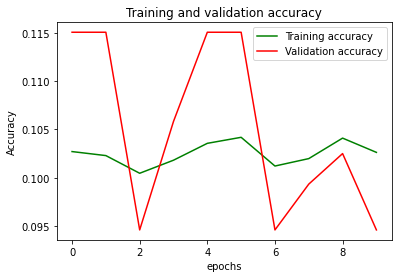

<Figure size 432x288 with 0 Axes>

In [31]:
# Cell 27
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

Describe and explain your findings here:

Regularization parameter is a penalty for large positive or negative values of the weights of the model, so this parameter helps to regulate model complexity. The larger regularization the more penalty is induced. 

So in the case of overfitting (overfiting is when we have a good training accuracy but the validation accuracy is much worse, so the model overfitted the training data) it is helpful to implement regalarization to decrease the model complexity. 

However, too much regalarization results in underfitting when we have a too simple model and bad accuracy results for both training and validation sets.  

On the plot above, we can see that the values 0.1 or 1 for regularization are too big because it resulted in underfitting, the model performs badly on both training and validation sets (for reg =1 training accuracy is only about 0.105 and validation accuracy is 0.1).
When the regularization parameter is equal to 0.01, 0.001 or 0.0001 we don't have underfitting or overfiiting but we can see that with the values of regularization 0.001 or 0.0001 we achieve the better accuracy and a small loss than for value=0.01. So my choice would be value 0.001 for regularization. 

## Hyper-parameter Tuning

You are now free to tune any hyperparameters for better accuracy. In this block type the configuration of your best model and provide a brief explanation of why it works.

In [ ]:
# Cell 28
# hyperparameter tuning
# learning_rate = 0.25  reg=0.001  epochs=15
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

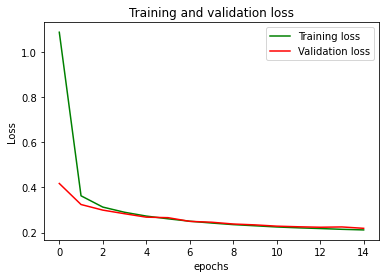

<Figure size 432x288 with 0 Axes>

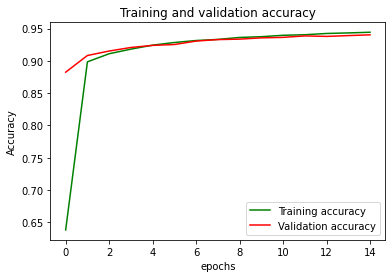

<Figure size 432x288 with 0 Axes>

In [37]:
# Cell 29
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [ ]:
# Cell 30
#To collect submission
!sh collect_submission.sh

# For Windows
# ! collect_submission.bat